In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from stop_words import get_stop_words
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from yellowbrick.features.importances import FeatureImportances
import pickle
import os

In [9]:
df = pd.read_pickle('../Data Files/merged.pkl')
print(df.shape)
df.head()

(1016, 21)


,category,channelId,channelTitle,classification,commentCount,comments,commonMal,completeDomains,description,domains,...,links,linksCount,linksDown,linksDownCount,linksUp,redirectedDomains,tags,title,videoId,viewCount
0,People & Blogs,UCFqanUMpCMh54RmqRFh8hZw,ProfitClicksDelux,f,240.0,[Well I found free $3421a money making system ...,0.0,NaN,After months of searching for a constant onlin...,NaN,...,"[http://www.neobux.com/?r=dirven, http://imgur...",2.0,"[[http://www.neobux.com/?r=dirven, HTTP error]]",1,[https://imgur.com/NcIH1y8],NaN,"[Money (TV Episode), How-to (Media Genre), Bus...",How to make money online just by clicking ads ...,https://www.youtube.com/watch?v=dFotOUq0Z4E,296630.0
1,Autos & Vehicles,UCfed0SJsJPmv-TTlZfHFWpA,TeCHnical sHarma,f,NaN,No comments,0.0,NaN,Hello à¤¦à¥‹à¤¸à¥�à¤¤à¥‹à¤‚ ðŸ˜ŠðŸ˜Š\n\nPlease...,NaN,...,[https://play.google.com/store/apps/details?id...,3.0,[],0,[https://play.google.com/store/apps/details?id...,NaN,"[Earn Free Money, Make Money with Android App,...",Earn Money by Clicking On own Android App. Ea...,https://www.youtube.com/watch?v=nz7Fs7YPCIM,169662.0
2,How-to & Style,UCj2zirDn1hkPKSARbARfeQw,iampauljames,b,242.0,"[Great job Sir!, Paul is it hard to get approv...",0.0,NaN,IM Report 360 outlines exactly how you can mak...,NaN,...,No links,0.0,[],0,[],NaN,"[Make Money Online, Pay Per Click, Affiliate]",Make Money Online With No Website Using Pay Pe...,https://www.youtube.com/watch?v=JYVTcpIXi_4,206170.0
3,How-to & Style,UCRfWuSls0R7jQazuddXiPvQ,Tyler Pratt,f,8.0,"[Didn't work, The real big money?? LOL cl...",0.0,NaN,My #1 Recommendation To Earning Income Online ...,NaN,...,"[http://go.tylerpratt.com/, http://go.tylerpra...",9.0,[],0,"[https://go.tylerpratt.com/, https://go.tylerp...",NaN,"[make money online, tyler pratt, tylerpratt, e...",Easy Side Online Job Clicking Ads and Making M...,https://www.youtube.com/watch?v=H1KmFXp2Ymg,7104.0
4,People & Blogs,UC4l9z0a-bFvZyX1HAqn270A,Sevendollarclick.com,f,NaN,No comments,0.0,NaN,Click here to start making money: \nhttp://www...,NaN,...,"[http://www.sevendollarclick.com, https://www....",12.0,[],0,"[https://sevendollarclick.com/, https://www.yo...",NaN,"[how to make money, how to make money online, ...",Earn Money By Clicking Ads | Earn $7 Per Click...,https://www.youtube.com/watch?v=WBHBZMeywY4,53451.0


In [3]:
df.columns

Index(['category', 'channelId', 'channelTitle', 'classification',
       'commentCount', 'comments', 'commonMal', 'completeDomains',
       'description', 'domains', 'linkContent', 'links', 'linksCount',
       'linksDown', 'linksDownCount', 'linksUp', 'redirectedDomains', 'tags',
       'title', 'videoId', 'viewCount'],
      dtype='object')

### extract feature columns

In [10]:
data = df[['classification','description','title','tags']]

data['feature'] = (data['description'] + ' ' 
                   + data['title'] + ' ' 
                   + data['tags'].apply(lambda l: ' '.join(l)))
data.drop(['description','title','tags'], 
          axis=1, inplace=True)

data['feature'] = (data['feature']
                   .str.encode('ascii', 'ignore')
                   .str.decode('utf-8')
                   .astype(str))
data.head()

C:\Users\ruote\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ruote\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\ruote\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[

,classification,feature
0,f,After months of searching for a constant onlin...
1,f,"Hello \n\nPlease like, share, subscribe \n\nT..."
2,b,IM Report 360 outlines exactly how you can mak...
3,f,My #1 Recommendation To Earning Income Online ...
4,f,Click here to start making money: \nhttp://www...


### preprocessing

In [11]:
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()
en_stop = get_stop_words('en')

In [12]:
data['feature'] = (data['feature'].str
                   .lower()
                   .replace(r'\d+', '', regex=True)
                   .apply(lambda s: tokenizer.tokenize(s))
                   .apply(lambda toks: [j for j in toks if not j in en_stop])
                   .apply(lambda toks: [p_stemmer.stem(j) for j in toks])
                   .apply(lambda toks: ' '.join(toks))
                   .replace(r'www|http|https|com', '', regex=True)
                  )

C:\Users\ruote\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
data.head()

,classification,feature
0,f,month search constant onlin earn money found o...
1,f,hello pleas like share subscrib thank subscrib...
2,b,im report outlin exactli can make money onlin ...
3,f,remend earn in onlin click go tylerpratt loo...
4,f,click start make money sevendollarclick ___...


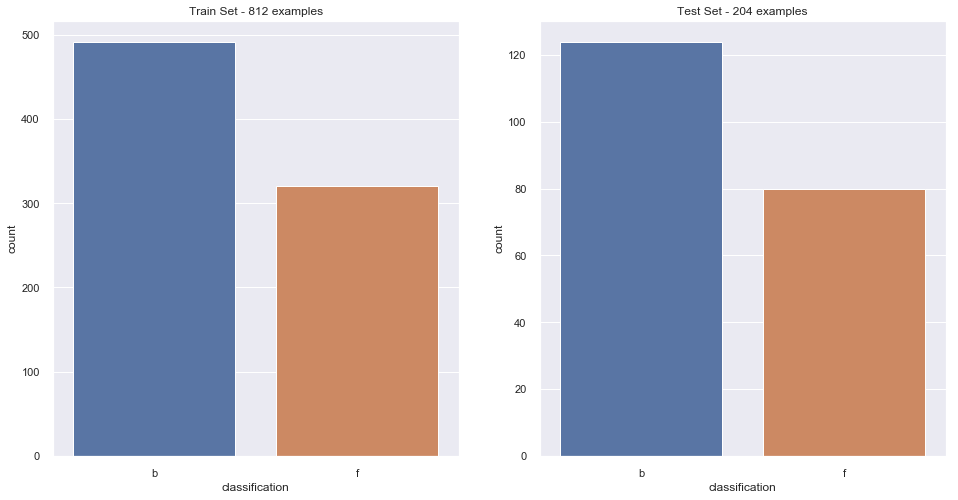

In [13]:
train, test = train_test_split(data, test_size=0.2, random_state=2)

# Plot to ensure class distribution is intact after splitting
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
sns.countplot(data=train, x='classification', ax=axes[0]);
axes[0].set_title(f'Train Set - {train.shape[0]} examples');
sns.countplot(data=test, x='classification', ax=axes[1]);
axes[1].set_title(f'Test Set - {test.shape[0]} examples');

In [14]:
enc = CountVectorizer()
train_x = enc.fit_transform(train['feature'])
test_x = enc.transform(test['feature'])

In [15]:
len(enc.vocabulary_)

11324

### the model

In [124]:
clf = RandomForestClassifier(n_estimators=10_000, criterion='gini', random_state=2)
clf.fit(train_x, train['classification'].cat.codes)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [126]:
# train accuracy
clf.score(train_x, train['classification'].cat.codes)

1.0

In [127]:
preds = clf.predict(test_x)

In [333]:
# test accuracy
clf.score(test_x, test['classification'].cat.codes)

0.9313725490196079

In [153]:
print(classification_report(test['classification'].cat.codes, preds,
                            target_names=test['classification'].cat.categories))

              precision    recall  f1-score   support

           b       0.97      0.92      0.94       124
           f       0.88      0.95      0.92        80

   micro avg       0.93      0.93      0.93       204
   macro avg       0.92      0.93      0.93       204
weighted avg       0.93      0.93      0.93       204



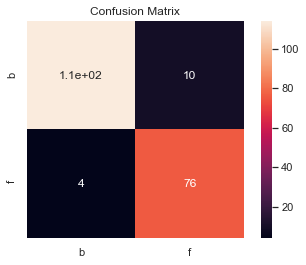

In [169]:
cmat = confusion_matrix(test['classification'].cat.codes, preds)
ax = sns.heatmap(cmat, annot=True, square=True, 
                 xticklabels=test['classification'].cat.categories,
                 yticklabels=test['classification'].cat.categories);
ax.set_title('Confusion Matrix');

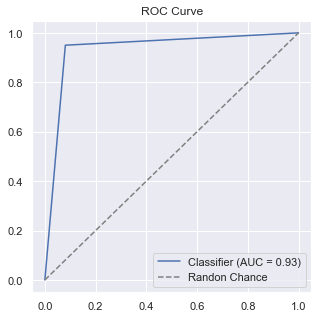

In [176]:
fpr, tpr, _ = roc_curve(test['classification'].cat.codes, preds)
auc = roc_auc_score(test['classification'].cat.codes, preds)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(fpr, tpr, label=f'Classifier (AUC = {auc:.2f})')
ax.plot([0,1], [0,1], linestyle='dashed', color='grey', label='Randon Chance')
ax.set_title('ROC Curve')
ax.legend();

### model diagnostics

In [351]:
imp = pd.DataFrame({'imp': clf.feature_importances_}, 
                   index=enc.get_feature_names())
imp.sort_values('imp', ascending=False, inplace=True)

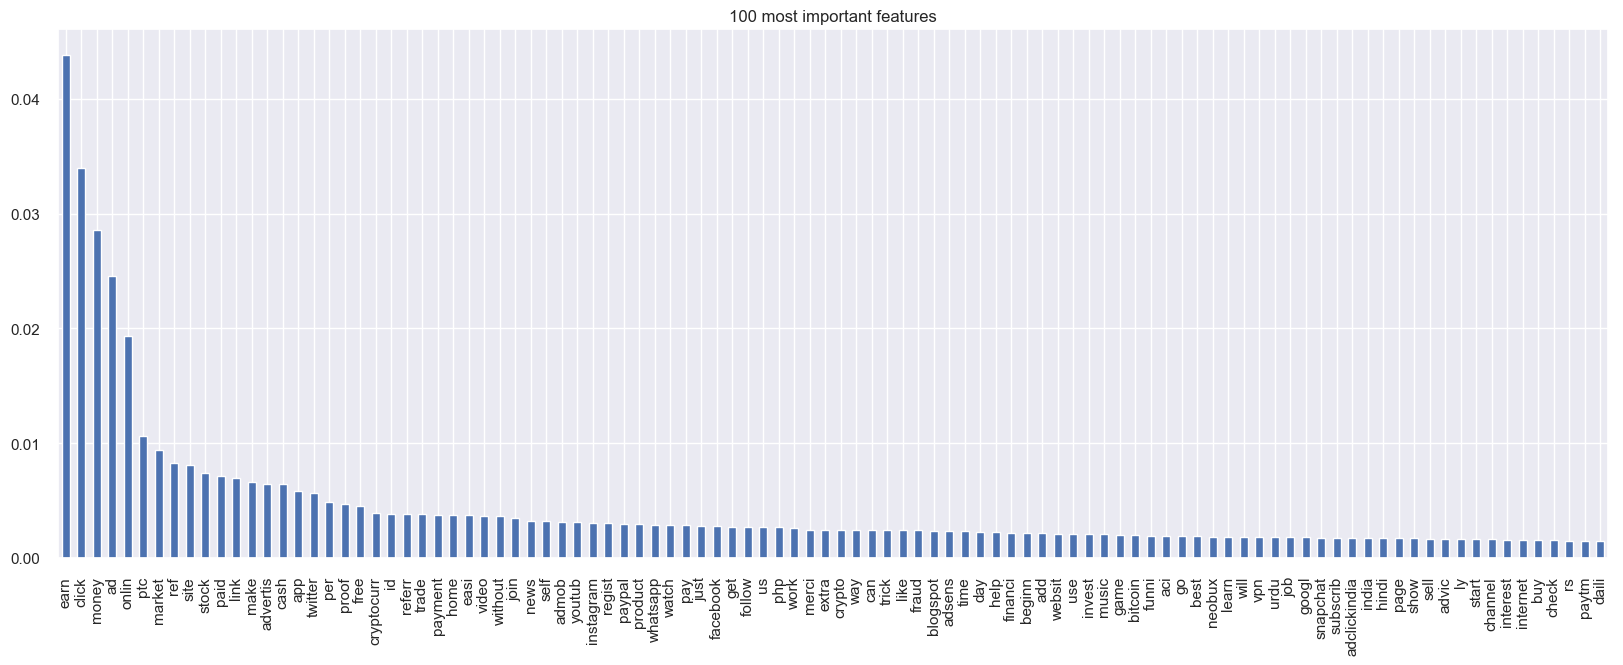

In [361]:
fig, ax = plt.subplots(figsize=(20,7), dpi=100)
top_n = 100
imp.iloc[:top_n].plot(kind='bar', ax=ax);
ax.set_title(f'{top_n} most important features')
ax.legend().remove()

In [364]:
clf.estimators_[42]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=280403398, splitter='best')

In [ ]:
export_graphviz(clf.estimators_[42], out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

### hyperparameters

In [16]:
k_fold = 5

In [16]:
# excercise patience with this
train_sz, train_score, test_score = learning_curve(RandomForestClassifier(n_estimators=10_000, criterion='gini', random_state=2), 
                                                   train_x, train['classification'].cat.codes, 
                                                   cv=k_fold, verbose=2, random_state=2, n_jobs=-1)

[learning_curve] Training set sizes: [ 64 210 356 502 649]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  1.5min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  2.8min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.1min finished


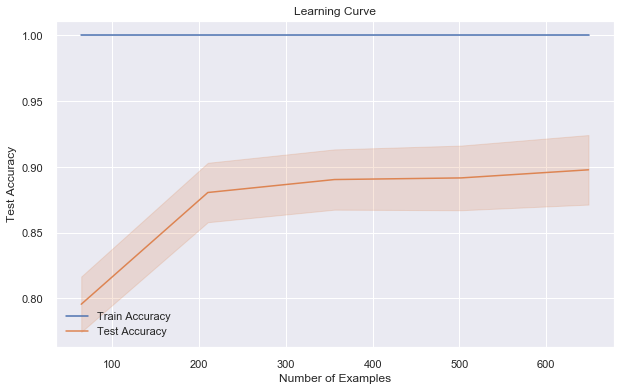

In [20]:
results = pd.DataFrame({
    'Number of Examples': np.tile(train_sz, (k_fold,1)).T.flatten(),
    'Train Accuracy': train_score.flatten(),
    'Test Accuracy': test_score.flatten(),
})

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=results, x='Number of Examples', y='Train Accuracy', ci='sd',
             label='Train Accuracy', ax=ax)
sns.lineplot(data=results, x='Number of Examples', y='Test Accuracy', ci='sd',
             label='Test Accuracy', ax=ax)
ax.set_title('Learning Curve');
ax.legend();

In [17]:
params = {
    'n_estimators': [100,500,1000,5000,10_000,15_000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,4,6,8],
    
}

In [18]:
cv_clf = GridSearchCV(RandomForestClassifier(), param_grid=params, refit=True, 
                      n_jobs=-1, iid=False, cv=k_fold, 
                      return_train_score =True, verbose=2)
cv_clf.fit(train_x, train['classification'].cat.codes)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 25.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000, 5000, 10000, 15000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [19]:
# Save grid search results
with open(f'results/RF_grid_{k_fold}fold_results.pkl', 'wb') as f:
    pickle.dump(cv_clf, f)

In [20]:
# Load grid search results
with open(f'results/RF_grid_{k_fold}fold_results.pkl', 'rb') as f:
    cv_clf = pickle.load(f)

In [22]:
cv_clf.best_params_

{'criterion': 'gini', 'min_samples_split': 6, 'n_estimators': 100}

In [23]:
cv_clf.best_score_

0.9027645232144209

In [24]:
cv_results = pd.DataFrame(cv_clf.cv_results_)

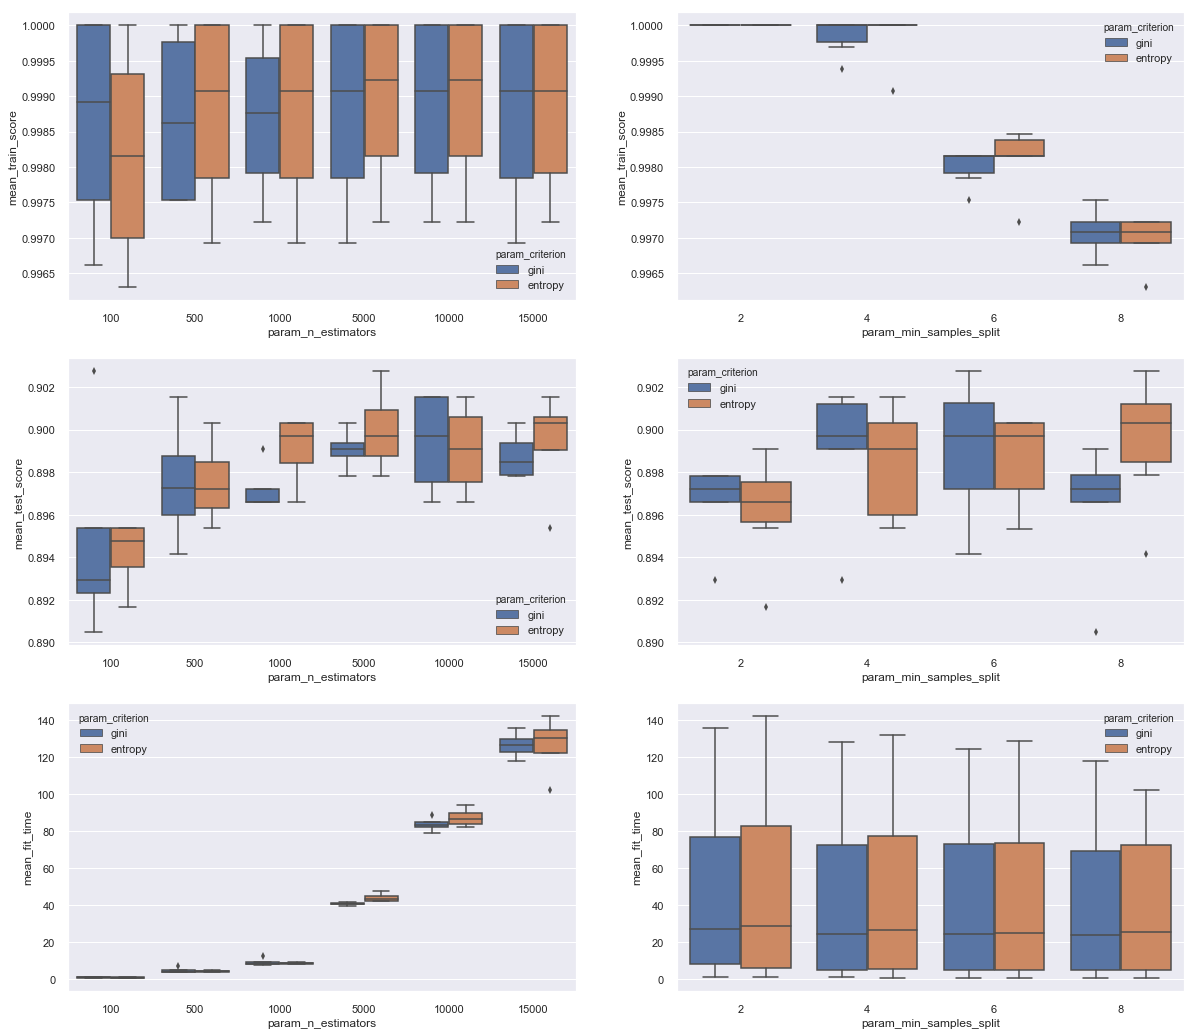

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
axes = axes.flatten()

sns.boxplot(data=cv_results, x="param_n_estimators", y="mean_train_score", 
            hue='param_criterion', ax=axes[0])
sns.boxplot(data=cv_results, x="param_min_samples_split", y="mean_train_score", 
            hue='param_criterion', ax=axes[1])

sns.boxplot(data=cv_results, x="param_n_estimators", y="mean_test_score", 
            hue='param_criterion', ax=axes[2])
sns.boxplot(data=cv_results, x="param_min_samples_split", y="mean_test_score", 
            hue='param_criterion', ax=axes[3])

sns.boxplot(data=cv_results, x="param_n_estimators", y="mean_fit_time", 
            hue='param_criterion', ax=axes[4])
sns.boxplot(data=cv_results, x="param_min_samples_split", y="mean_fit_time", 
            hue='param_criterion', ax=axes[5]);

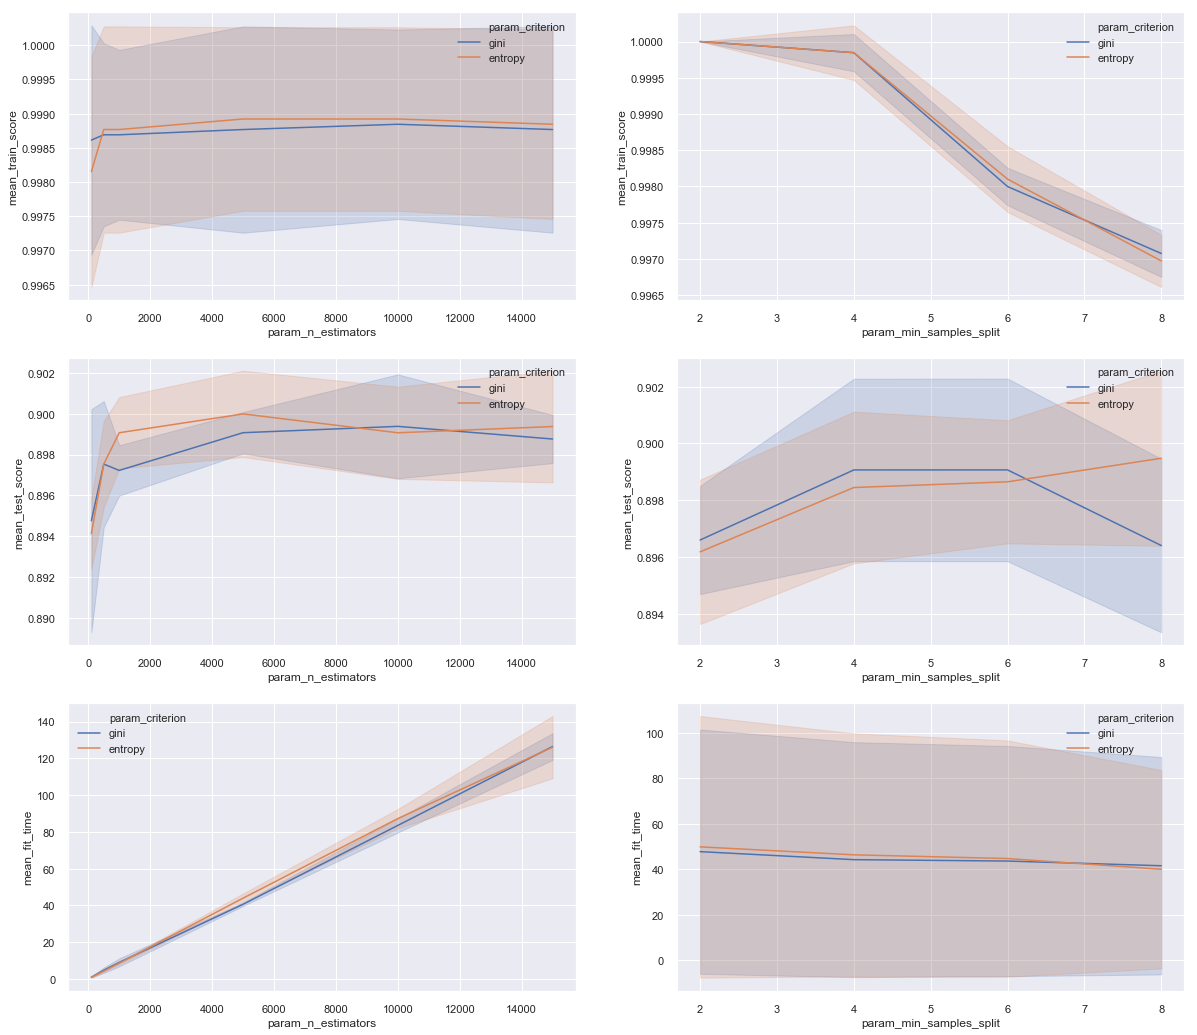

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
axes = axes.flatten()

sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_train_score', 
             hue='param_criterion', ci='sd', ax=axes[0])
sns.lineplot(data=cv_results, x='param_min_samples_split', y='mean_train_score', 
             hue='param_criterion', ci='sd', ax=axes[1])

sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_test_score', 
             hue='param_criterion', ci='sd', ax=axes[2])
sns.lineplot(data=cv_results, x='param_min_samples_split', y='mean_test_score', 
             hue='param_criterion', ci='sd', ax=axes[3])

sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_fit_time', 
             hue='param_criterion', ci='sd', ax=axes[4])
sns.lineplot(data=cv_results, x='param_min_samples_split', y='mean_fit_time', 
             hue='param_criterion', ci='sd', ax=axes[5]);